In [1]:
# Import libraries
import tweepy as tw
import matplotlib.pyplot as plt
import pandas as pd
from textblob import TextBlob
import re
from wordcloud import WordCloud
# API key, API secret, access token, access token secret
API_KEY = 'sau5wefTlt00B89Sc6T1Os4Gy'
API_SECRET = 'JSg6Yyjx2o0oWETuFOiLoIXF1FAbTOj7FmX6GTS3vvIiJZNczk'
ACCESS_TOKEN = '2605619839-gosJKVnMUIbZPCGoC6cAzkzvAgto0jmg2r0DExD'
ACCESS_TOKEN_SECRET = 'siIkXRXgFuN1yUditYIYaWkVy8saqsWiEuwp69TM8CG3v'

# Authentification
auth = tw.OAuthHandler(API_KEY, API_SECRET)
auth.set_access_token(ACCESS_TOKEN, ACCESS_TOKEN_SECRET)

# API
api = tw.API(auth, wait_on_rate_limit=True)

In [2]:
# Remove urls function
def remove_url(txt):
  return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

# Cleaning tweet functions
def clean_text(text):
  text = re.sub("@[A-Za-z0-9]+", "", text) # Remove @mentions
  text = re.sub("#", "", text) # Remove '#'
  text = re.sub("RT[\s]+", "", text) # remove RT
  text = re.sub("https?:\/\/\S+", "", text) # Remove hyperlink
  return text

In [3]:
# Create custom search and define the number of tweets
search_custom = "#piyungan OR sampah piyungan OR sampah OR #tpstpiyungan OR tpst OR piyungan OR tpst piyungan -filter:retweets"

# Taking the tweets
raw_tweets = tw.Cursor(api.search,
                       q=search_custom,
                       lang='id',
                       since='2020-12-01',
                       tweet_mode="extended").items(2000)

# Removing url on raw_tweets
clean_raw_tweets = [remove_url(clean_text(raw_tweet.full_text)) for raw_tweet in raw_tweets]
clean_raw_tweets[:10]

['TPST Piyungan Disegel Warga Sampah Membludak di JalananKejadian seperti ini tentunya tdk perlu trjd bl pengelolaan sampah di TPA menggunakan tekhnologi yang tepat efektif efisien dan ramah lingkungan Sampah merupakan bahan baku untuk produksi bahan bakar baru terbarukan',
 'Bertani Ind Coba ikut masuk ke skema KPBU Mas itu kan masih ditawarkan baru market sonding Siapa tahu nanti bs diambil oleh pengusaha daerah utk pengelolaan sampah di TPA Piyungan',
 'Ind Bertani Sebetulnya Bulan Desember tahun kmrn sdh dilakukan market sounding utk pengelolaan sampah dg sistem KPBU Semoga ada pihak swasta atau BUMN yg ikut utk bs menjadi investor pengelolaan sampah di TPA Piyungan',
 'Bertani Ind Njih Pak mungkin skrg bisa pakai skema KPBU nanti pihak swasta yg mengelola sampah di TPA Piyungan Semoga lekas ada solusi buat masyarakat Jogja pd khususnya',
 'Bertani Ind Siap semoga masalah sampah di TPA Piyungan tdk berlarutlarut dr dulu',
 'Bertani Ind Masalah seperti ini sudah tahunan terjadi perl

In [4]:
# Create textblob object from clean_raw_tweets and translate into english
from googletrans import Translator
translator = Translator()
sentiment_objects = []
for clean_raw_tweet in clean_raw_tweets:
  tr = translator.translate(clean_raw_tweet, dest="en")
  blob = TextBlob(tr.text)
  sentiment_objects.append(blob)

sentiment_objects[0].polarity, sentiment_objects[0]

(0.1094726701869559,
 TextBlob("TPST Piyungan Sealed Residents of Trash Bursting on the Streets Of course, there is no need for waste management in TPA to use the right technology, effective, efficient and environmentally friendly Waste is a raw material for the production of new and renewable fuels"))

In [5]:
# Create a list that consist of polarity values and the tweets
sentiment_values = [[sentiment_object.sentiment.polarity, str(sentiment_object)]for sentiment_object in sentiment_objects]

sentiment_values[:10]

[[0.1094726701869559,
  'TPST Piyungan Sealed Residents of Trash Bursting on the Streets Of course, there is no need for waste management in TPA to use the right technology, effective, efficient and environmentally friendly Waste is a raw material for the production of new and renewable fuels'],
 [-0.02121212121212122,
  "Farming Ind Try to get into the Mas PPP scheme, it's still being offered a new market sonding. Who knows, it can be taken later by regional entrepreneurs for waste management at Piyungan TPA"],
 [-0.2,
  'Ind Bertani In fact, in December of this year, there was a market sounding for waste management using the PPP system.'],
 [-0.1,
  'Farming Ind Njih Sir, maybe now you can use the PPP scheme. The private sector will manage waste at the Piyungan TPA.'],
 [0.016666666666666666,
  'Farming Ind Ready, hopefully the waste problem in the Piyungan TPA will not drag on'],
 [-0.2,
  'Indigenous Farming Problems like this have occurred for years, a strategic policy for handlin

In [6]:
# Create dataframe from sentiment_values
sentiment_df = pd.DataFrame(sentiment_values, columns=['Polarity', 'Tweet'])

sentiment_df.head(10)

,Polarity,Tweet
0,0.109473,TPST Piyungan Sealed Residents of Trash Bursti...
1,-0.021212,Farming Ind Try to get into the Mas PPP scheme...
2,-0.200000,"Ind Bertani In fact, in December of this year,..."
3,-0.100000,"Farming Ind Njih Sir, maybe now you can use th..."
4,0.016667,"Farming Ind Ready, hopefully the waste problem..."
5,-0.200000,Indigenous Farming Problems like this have occ...
6,0.000000,"If God sends rain one day and night, it will d..."
7,0.150000,Ind jogja Hopefully the Governor of DIY and th...
8,0.000000,ENVIROMATION TPA PIYUNGAN Hello Enviro On this...


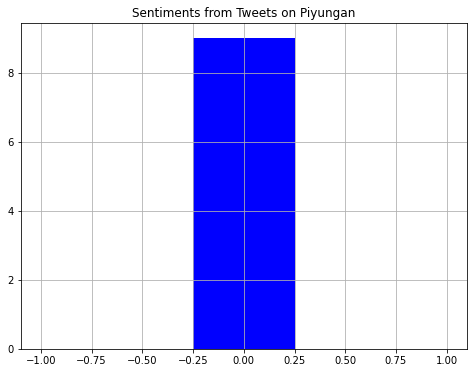

In [7]:
# Plot histogram of the polarity values
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Piyungan")
plt.show()

In [8]:
# Remove polarity values equal to zero
sentiment_df = sentiment_df[sentiment_df.Polarity != 0]

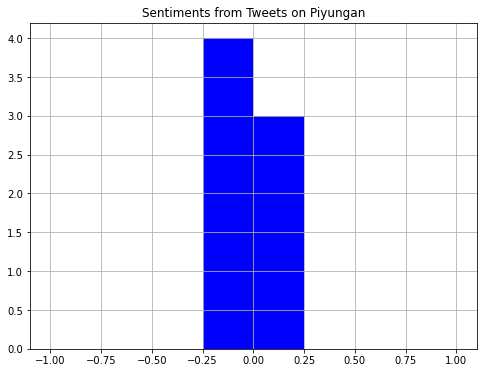

In [9]:
# Plot histogram with break at zero
fig, ax = plt.subplots(figsize=(8, 6))

sentiment_df.hist(bins=[-1, -0.75, -0.5, -0.25, 0.0, 0.25, 0.5, 0.75, 1],
             ax=ax,
             color="blue")

plt.title("Sentiments from Tweets on Piyungan")
plt.show()

In [10]:
# Get polarity values and get the sentiment from the tweets
total_polarity = 0
sentiment = ""

for tweet in sentiment_objects:
  total_polarity += tweet.polarity

total_polarity /= len(sentiment_objects)

if(total_polarity > 0):
  sentiment = "Positive"
elif(total_polarity < 0):
  sentiment = "Negative"

print("Polarity  : " + str(total_polarity))
print("Sentiment : " + sentiment)

Polarity  : -0.02723030937316652
Sentiment : Negative


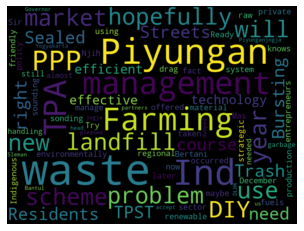

In [11]:
# Plot the word cloud
allWords = " ".join([tweet for tweet in sentiment_df["Tweet"]])
wordcloud = WordCloud(width = 800, height = 600, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordcloud, interpolation = "bilinear")
plt.axis("off")
plt.show()